# RCpp assignment Task 4: Example usage

In this notebook we give some examples of using the convex hull package with some randomly generated data. The first step is to install and load the required packages if necessary. 

In [1]:
# if we need to install convexhull from github, we will need the devtools package. 
if(!require("convexhull")){
    if(!require("devtools")){
        install.packages("devtools")
    }
    library(devtools)
    install_github("grahamburgess3/convexhull")
}

# We will need the ggplot2 and rlang packages for plotting. 
if(!require("rlang")){
    install.packages("rlang")
}
if(!require("ggplot2")){
    install.packages("ggplot2")
}

# load packages
library(convexhull)
library(rlang)
library(ggplot2)

Loading required package: convexhull

Loading required package: rlang

Loading required package: ggplot2



Now that we have installed and loaded the packges we need, we can create some dummy data to test the function. 

In [2]:
set.seed(1)
x <- rnorm(100)
y <- rnorm(100)
test_data <- data.frame(x,y)

Now we can test the Jarvis March algorithm by calling the jarvis_march() function

In [3]:
test_results <- jarvis_march(test_data)

The object "test_results" is a list with two elements - "input_data" and "hull". Let us first print out the "hull" to see the results in raw format. "hull" is itself a list with $N$ elements (where $N$ is the number of line segments which forms the convex hull). Each line segment (or list element) contains four numbers giving the x- and y-coordinates of the start and end of the line segment. So the line segment connecting the second and third point on the convex hull would be (x_2,y_2,x_3,y_3). The data for these line segments for the convex hull of the example data is given below. 

In [4]:
test_results$hull

[[1]]
[1] -2.2146999 -0.6506964 -1.2765922  1.4411577

[[2]]
[1] -1.2765922  1.4411577 -0.8204684  1.7672873

[[3]]
[1] -0.8204684  1.7672873  0.1887923  2.2061025

[[4]]
[1] 0.1887923 2.2061025 0.4755095 2.3079784

[[5]]
[1] 0.4755095 2.3079784 2.4016178 0.4251004

[[6]]
[1]  2.4016178  0.4251004  1.9803999 -1.0751923

[[7]]
[1]  1.980400 -1.075192  1.433024 -1.487460

[[8]]
[1]  1.4330237 -1.4874603  0.8811077 -1.6406055

[[9]]
[1]  0.8811077 -1.6406055 -0.1645236 -1.9143594

[[10]]
[1] -0.1645236 -1.9143594 -1.5235668 -1.4672500

[[11]]
[1] -1.5235668 -1.4672500 -2.2146999 -0.6506964

This output shows us that there are eleven line segments making up the convex hull. The first line segment goes from point (-2.21,-0.65) to (-1.28,1.44). You will notice that the last line segment ends at the same point as the start of the first element, as expected. The convex hull is best visulised graphically, as shown below. 

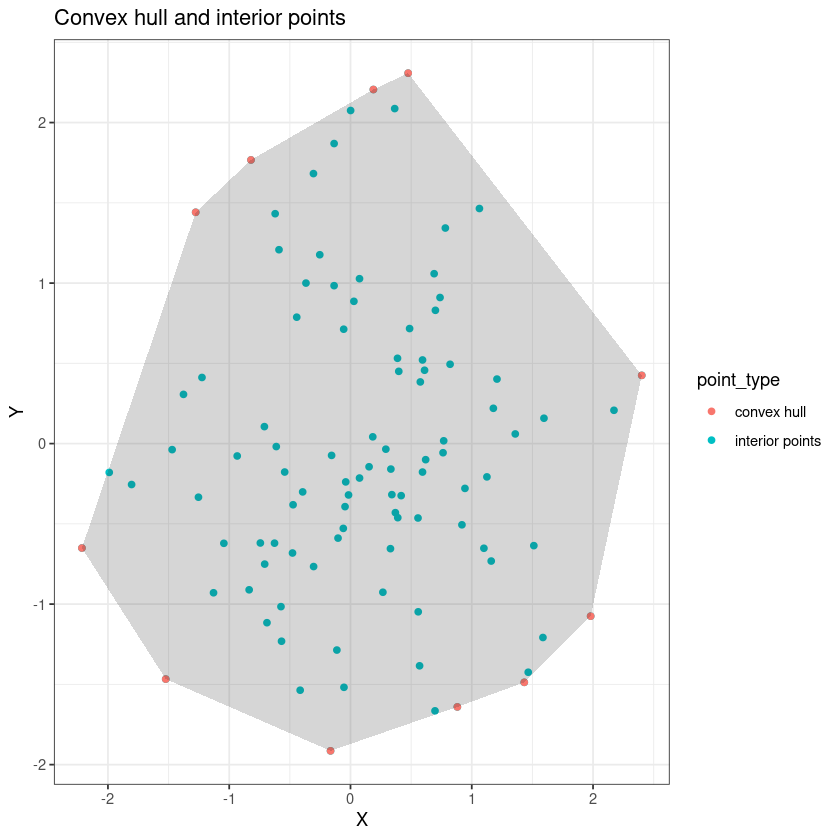

In [5]:
plot_hull(test_results)

Finally, we can use the supplementary package "in_hull" to check which of a given set of points is in the convex hull. For example, let us randomly select 10 points from the initial set of points, and see which of these lies in the convex hull. 

In [6]:
set.seed(1)
indices <- floor(runif(10, min=0, max=101))

In [7]:
points_to_check <- list()
for (i in 1:10){
    points_to_check[[i]] <- c(test_data$x[indices[i]],test_data$y[indices[i]])
}
in_hull(points_to_check, test_results$hull)

[[1]]
[1] 0.1887923 2.2061025

[[2]]
[1] -0.8204684  1.7672873

This last results shows us tha of the ten points which we randomly selected from the input data, two happen to fall in the convex hull, points with co-ordinates (0.19,2.21) and (-0.82,1.77). 